# Waveguides

The goal of this notebook is to investigate the fields created in waveguides.  It complements the material in Chapter 7 of _Classical Electromagnetic Radiation_ by Marion and Heald.

A ***mode*** of a waveguide is an allowed solution of Maxwell's equations.  We will investigate the following types of modes:

- TEM
- TE
- TM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This will give interactive plots within the notebook.
# %matplotlib notebook

# This will make interactive plots pop up in a separate window.
# It probably will not work in CoLab.
# %matplotlib tk

# This will yield static, inline plots.  The default.
# %matplotlib inline

In [2]:
# Define color scheme.
e_color = '#377eb8'
b_color = '#ff7f00'
s_color = '#4daf4a'

In [89]:
# Create a grid.
Lx = 1
Nx = 5
Ly = 1
Ny = 5
Lz = 4
Nz = 9

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x,y,z)

# Group all coordinates into a single array.
R = np.stack((X,Y,Z))

In [90]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

## TEM Modes

TEM modes are guided electromagnetic waves in which the electric and magnetic field are perpendicular to the direction of propagation.  The name stands for "transverse electromagnetic" and refers to the fact that both the electric field and magnetic field are perpendicular to the direction of propagation.

Plane waves are TEM modes, but not all TEM modes are plane waves.  Here, we analyze the TEM modes that can propagate between a set of parallel conducting plates.  See Section 7.2 of _CER_ for a detailed theoretical background.

We consider modes where the electric field is parallel to the conducting plates.  These can be described as a superposition of two plane waves within the waveguide.  The amplitudes of the waves are equal, but they are out of phase and travel in different directions:
$$
\vec{k}_1 = \begin{bmatrix} 0 \\ - k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
\qquad \qquad
\vec{k}_2 = \begin{bmatrix} 0 \\ + k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
$$

The magnetic field and Poynting vector are computed as with plane waves.

Let's look at some of these modes.

In [52]:
# Define convenience function to compute fields.
def get_plane_wave(E0,k,R,n=1,t=0):
    """
    Return electric and magnetic field arrays for an
    electromagnetic plane wave.
    
    E0 = [Ex, Ey, Ez]  (amplitude and polarization)
    k =  [kx, ky, kz]  (wave vector)
    R  = [X, Y, Z]     (coordinate arrays)
    n                  (index of refraction)
    t                  (time)
    
    Returns
    (E,B) where
    E = [Ex, Ey, Ez]
    B = [Bx, By, Bz]
    """
    
    # Create empty arrays of the correct shape.
    E = np.zeros_like(R, dtype=complex)
    B = np.zeros_like(R, dtype=complex)
    
    # Compute phase of the plane wave.
    k0 = np.sqrt(np.sum(k**2))
    omega = k0/n
    phase = np.exp(1j*(k[0]*R[0] + k[1]*R[1] + k[2]*R[2] - omega*t))

    # Compute the electric field.
    E[0] = E0[0] * phase
    E[1] = E0[1] * phase
    E[2] = E0[2] * phase
    
    # Compute the magnetic field.
    B[0] = (k[1]*E[2] - k[2]*E[1])/omega
    B[1] = (k[2]*E[0] - k[0]*E[2])/omega
    B[2] = (k[0]*E[1] - k[1]*E[0])/omega
    
    # Return the result.
    return E,B

In [98]:
# Define the wave vector.
# Give magnitude and angle of incidence (in radians).
k = 1
theta = np.radians(1*np.pi)
omega = k/n

# Set wave vector of incident wave.
k1x = 0
k1y = -k * np.cos(theta)
k1z = k * np.sin(theta)
k1 = np.array([k1x, k1y, k1z])

# Set wave vector of reflected wave.
k2x = 0
k2y = k * np.cos(theta)
k2z = k * np.sin(theta)
k2 = np.array([k2x, k2y, k2z])

# Set time of snapshot.
t0 = 2*np.pi / k * 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
# Set the amplitude and polarization.
E0 = 0.3
eHat = np.array([1,0,0])

e1 = E0 * eHat 
e2 = -e1

E1, B1 = get_plane_wave(e1,k1,R)
E2, B2 = get_plane_wave(e2,k2,R)

# Compute total electromagnetic field.
Ex = E1[0] + E2[0]
Ey = E1[1] + E2[1]
Ez = E1[2] + E2[2]

Bx = B1[0] + B2[0]
By = B1[1] + B2[1]
Bz = B1[2] + B2[2]

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

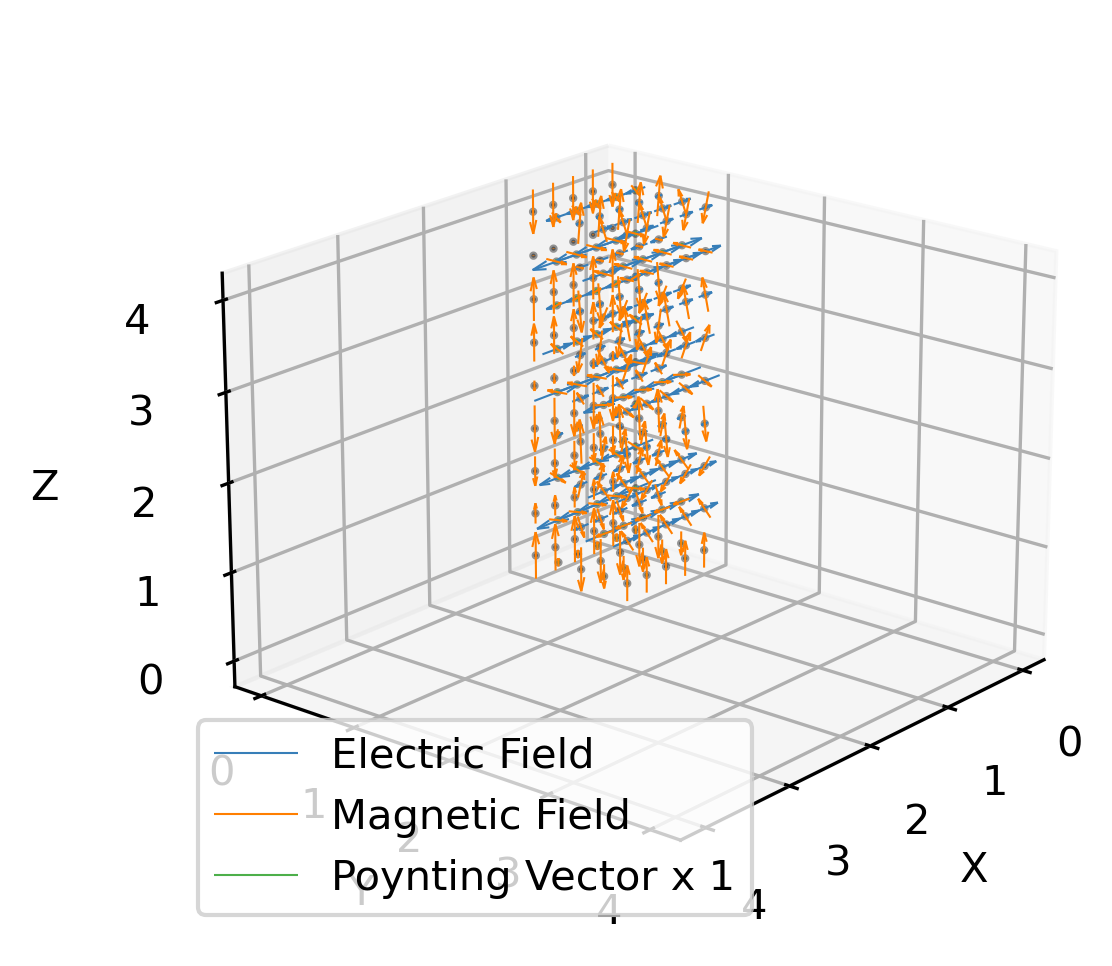

In [54]:
# Plot the field.
s_scale = 10

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % 1)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? Smallest?

***Describe your observations below.***

the electric field points along the X axis, alternating from + to - X
the magnetic field vectors vary in direction but apear to lay flat on the Y plain
the poynting field vectors are normal to the plain created by the electric and magnetic field vectors and follow the right hand rule

there appears to be waves of changing position in the field

1,0,3 (x,y,z) this area near the center appears to have a concentration of vectors

after changing the scale values it appears the poynting vectors are the largest in the center and get smaller the farther out from center

- Observe what happens as you change the wave vector, `k`.
- Observe what happens as you change the angle of incidence, `theta`.

***Describe your observations below.***

the lower the k value the less change in the field, i think this controls the number of waves

not exactly sure what this is but i would estimate it controls the ange at which the the waves enter

In order to satisfy the boundary conditions of this wave guide, the electric field should vanish on the conducting plates at $y=0$ and $y=b$ (or `y = box_width`.  (Other waves do not satisfy Maxwell's equations.  Although we can plot them, they are impossible to create in the real world.)

Adjust the ***angle*** and ***wave vector*** until you achieve this.

You may find the discussion on page 233 of _CER_ helpful ...

**Congratulations!**  You just created a TEM mode for this waveguide.

- What wave vector and angle did you use?
- How do the fields compare with your general observations above?  I.e., is there anything special about this field, aside from the fact that the electric field vanishes at the boundaries?

***Describe your observations below.***

i used np.pi as the theta value

it appears that poynting vectors also disapear, this makes sense as it is the cross product of electric and magnetic

Keep the magnitude of the wave vector constant, but adjust the ***angle*** until you find another value that gives zero field on the boundaries at $y=0$ and $y=b$.

- What wave vector and angle did you use this time?
- How do the fields for this TEM mode compare with your first TEM mode?

***Describe your observations below.***

i multiplied np.pi by any integer and the conditions are met

the areas outside of y=0 where electric field vectors change in size and number

## TE Modes

Now we will turn our attention to a different kind of waveguide: a hollow pipe.  As shown in _CER_ at the end of Section 7.3, there are no possible TEM modes in a hollow pipe.  However, we can find TE modes — in which the electric field is perpendicular to the direction of propagation but the magnetic field is not — and TM modes — in which the magnetic field is perpendicular to the direction of propagation and the electric field is not.  We focus on the rectangular waveguide of Section 7.5.

In a "remarkable set of equations" (7.52–55), Heald and Marion show that all of the components of the electric and magnetic fields can be obtained from the longitudinal components, $B_z$ and $E_z$.  For a TE mode, $E_z = 0$, and for a TM mode, $B_z=0$.  So we only need to know one component of the field to solve for the entire set.

For TE modes, the normal derivative of the longitudinal magnetic field must vanish on the boundaries.  This gives

$$
B_z = B_0 \, e^{i(k_z z - \omega t)} \, \cos \left( \dfrac{M \pi x}{a} \right) \, \cos\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TE mode.

In [57]:
t = 0

# Define the mode.
M = 1
N = 1

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.
a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal magnetic field.
B0 = 0.7
Bz = B0 * np.exp(1j*(kz*Z - omega*t)) * np.cos(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)

# Compute other components of fields.
Bx = -1j * kg * kx / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
By = -1j * kg * ky / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ex = n*omega / kg * By
Ey = -n*omega / kg * Bx
Ez = np.zeros_like(Bz)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

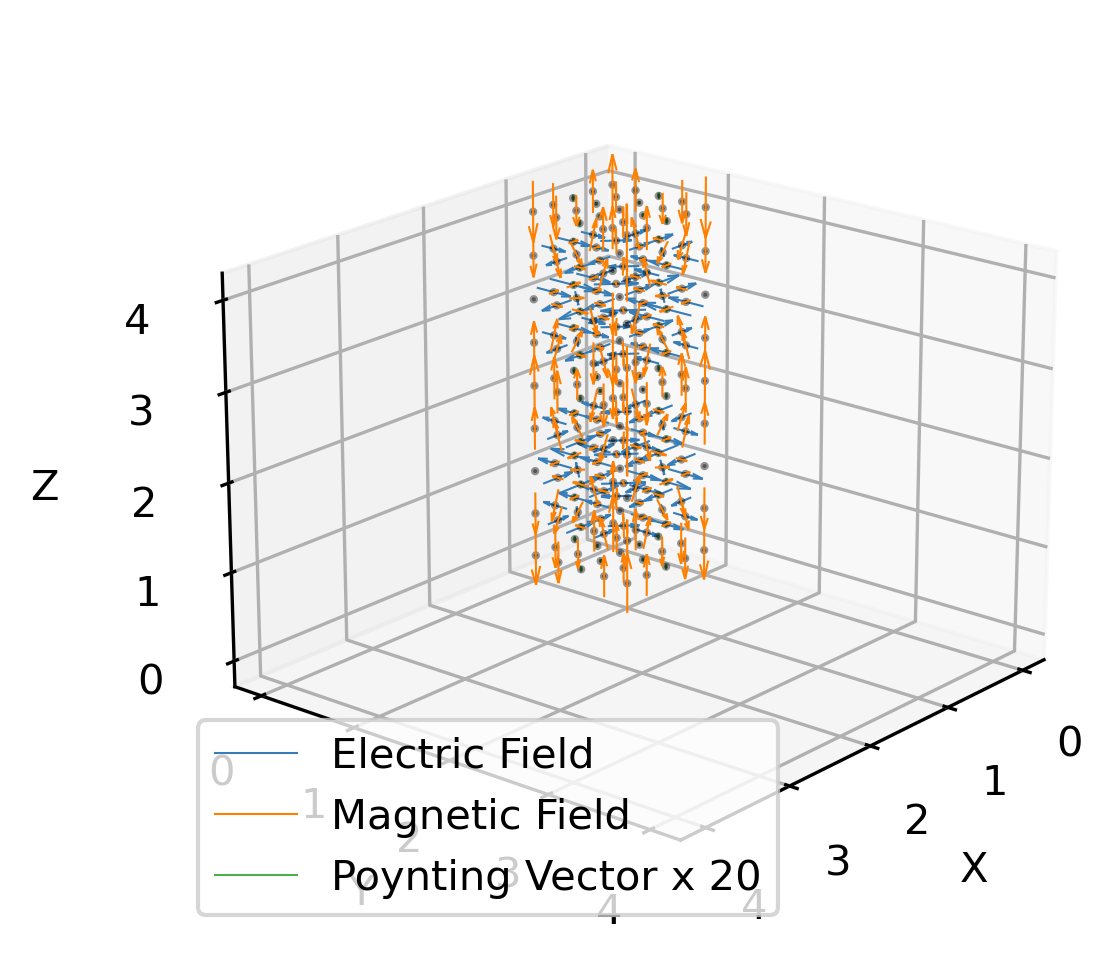

In [58]:
# Plot the field.
s_scale = 20

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Start with $M=1$ and $N=0$ — the TE₁₀ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

the electric field points in the direction of the y axis with two major groups, one in the - and one in the + direction
the magnetic field constantly points away from the the two major groups of the electric field and is along the xz plain
all poynting vectors point in the positive z direction

some areas do not have electric field vectors and therefore no poynting vectors

two circle areas running the lengeth of the y axis

it appears they are all the same size and only exist in the two cylinder shaped areas



Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

the area where vectrs are generated becomes smaller

Compare the TE₁₀ and TE₀₁ modes.  How are they similar?  How are they different?

***Describe your observations below.***

They look the exact same other than the vectors are rotated 90 degress about the xy plain

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

TE11 appears to be TE10 and TE01 mashed together

## TM Modes

For TM modes, the longitudinal electric field must vanish on the boundaries.  This gives

$$
E_z = E_0 \, e^{i(k_z z - \omega t)} \, \sin \left( \dfrac{M \pi x}{a} \right) \, \sin\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TM mode.

In [93]:
t = 0

# Define the mode.
M = 1
N = 2

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.
a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal electric field.
E0 = 0.7
Ez = E0 * np.exp(1j*(kz*Z - omega*t)) * np.sin(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)

# Compute other components of fields.
Ex = 1j * kg * kx / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ey = 1j * kg * ky / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
Bx = -n*omega / kg * Ey
By = n*omega / kg * Ex
Bz = np.zeros_like(Ez)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


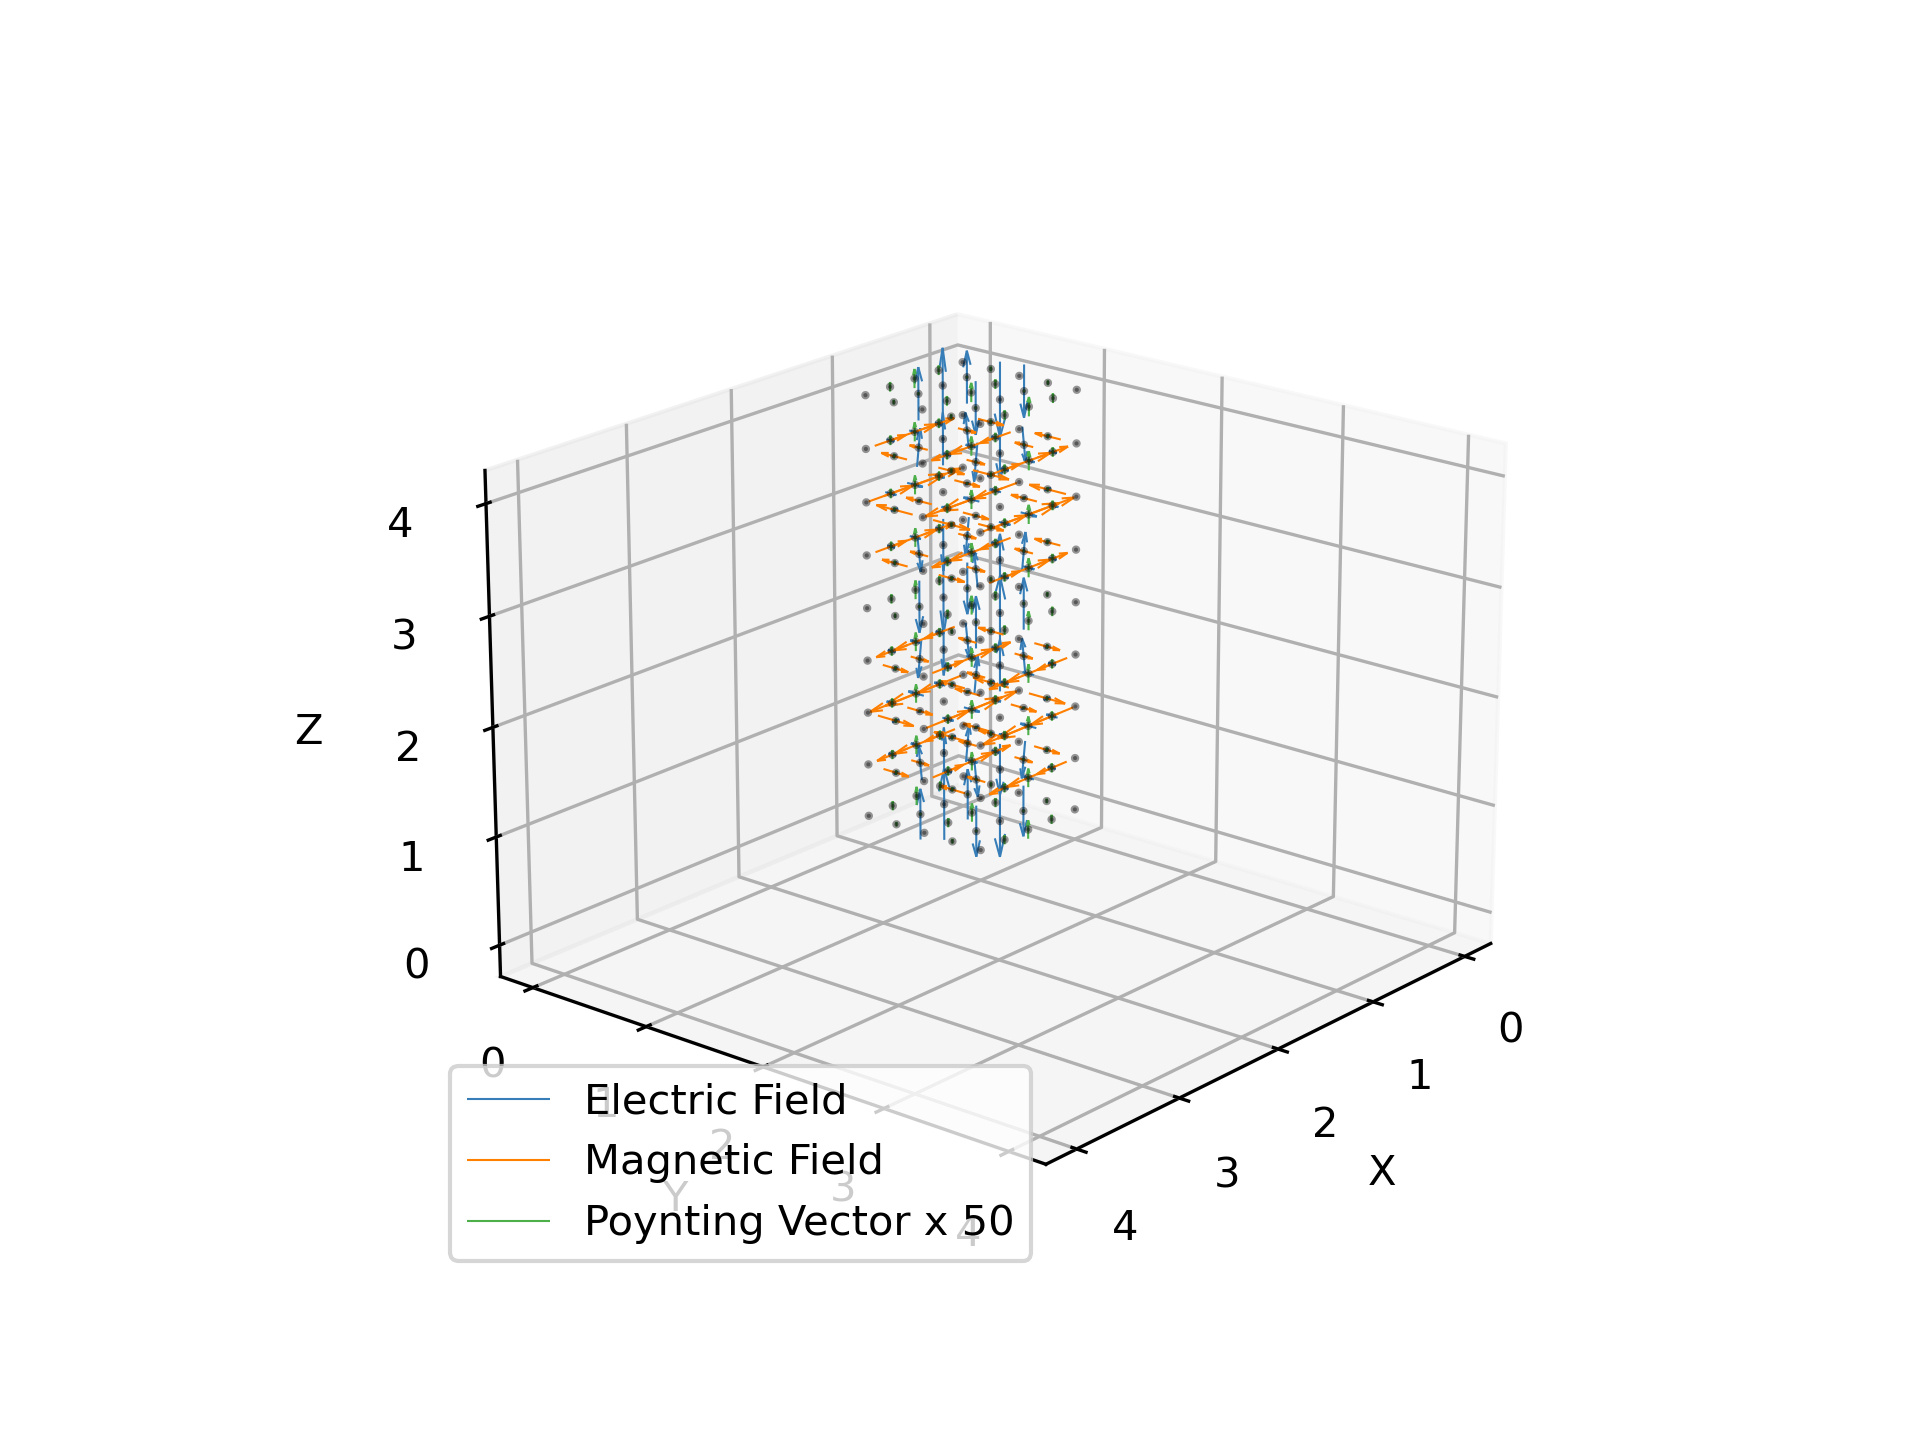

In [94]:
# Plot the field.
s_scale = 50

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

In [61]:
%matplotlib notebook

## Questions

Start with $M=1$ and $N=1$ — the TE₁₁ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

The electric field appears to be coming from two point charges
the magnetic field only exists around these two points
the poynting vectors all point in the positive z direction

the fields grow and shrink as you move along the z axis

the electric field has three large areas, between the two points and outsided of them

the poynting vectors are the largest in the same areas as the electric field

Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

the area of the field grows

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

When i change to 10 or 01 the vectors in the field go away and nothing is shown

Compare the TE₁₂ and TE₂₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

when changed to 12 or 21 the poynting vectors become larger
11 stays the same as previously noted

## Images of Fields

Compare the image of a TEM mode in Figure 7-3 with the plots you made above.

- How are they similar?  How are they different?
- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

***Describe your observations below.***

fig 7-3 does not contain vectors and provide as clear a picture as the python simulation does
The simulation in python is a way better representation, helps me far more as a visual learner


Try to create a plot of the TEM₁₀ that resembles Figure 7-6.  You may need to adjust the box size, number of grid points, and arrow sizes.

- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

need to ask question in class, i ended with k=1 theta = pi rad

In your opinion what would be the ideal way to represent the electromagnetic waves in a waveguide?  It could be a combination of images, math, text, audio, video, etc.  What features would you emphasize?  What would you leave out?

for me the best way to represent this is easily what we did in this notebook, being able to see the behavior of the vectors in the field is very helpful

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

python is a powerful tool
creating a TEM10 plot like fig 7-6, will ask in class
seeing how the variables affect the plot
how to recreat fig 7-6